<a href="https://colab.research.google.com/github/jgabrielg99/Python/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, recall_score, accuracy_score, precision_score, f1_score
from sklearn.utils import class_weight

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer, BatchNormalization
from keras.optimizers import SGD, Adam

import random

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AIML Course/Files/Churn.csv')
df = data.copy()

## Data Overview

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

* There are 10,000 rows and 14 columns in this dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There don't appear to be any missing values in any of the columns
* RowNumber, CustomerID, and Surname are all identifiers and will be dropped
* Geography and Gender should be categorically encoded

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['CustomerId'].nunique()

10000

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], inplace=True, axis=1)

In [ ]:
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

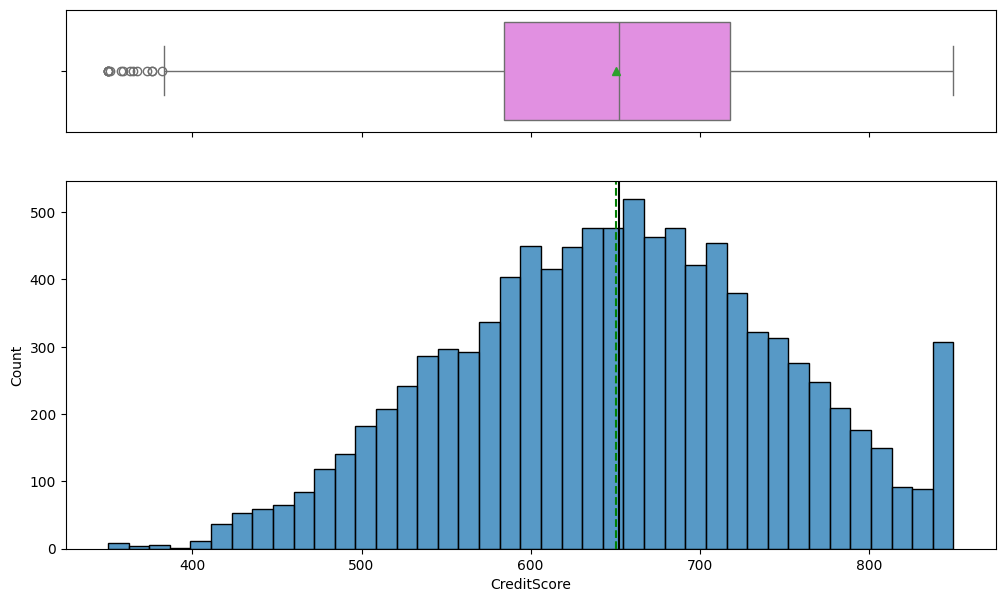

In [ ]:
histogram_boxplot(df, 'CreditScore')

* Credit Score mainly has a normal distribution, maybe very slightly left skewed
  * There a few outliers at the lower end of the data
  * There are a large number of customers (~300) that have the maximum credit score (850)
  * The average credit score is around 650


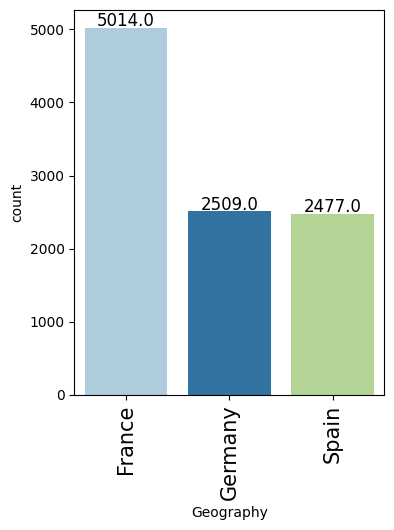

In [ ]:
labeled_barplot(df, 'Geography')

* There are only 3 geographical locations in this dataset
  * Approximately half of the customers are located in France
  * A quarter of the customers are located in Germany and Spain

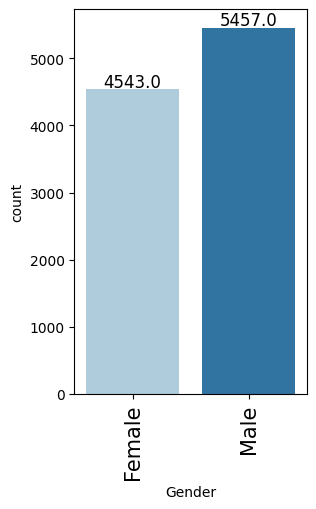

In [ ]:
labeled_barplot(df, 'Gender')

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Male,0.5457
Female,0.4543


* 55% of the data is male; 45% is female

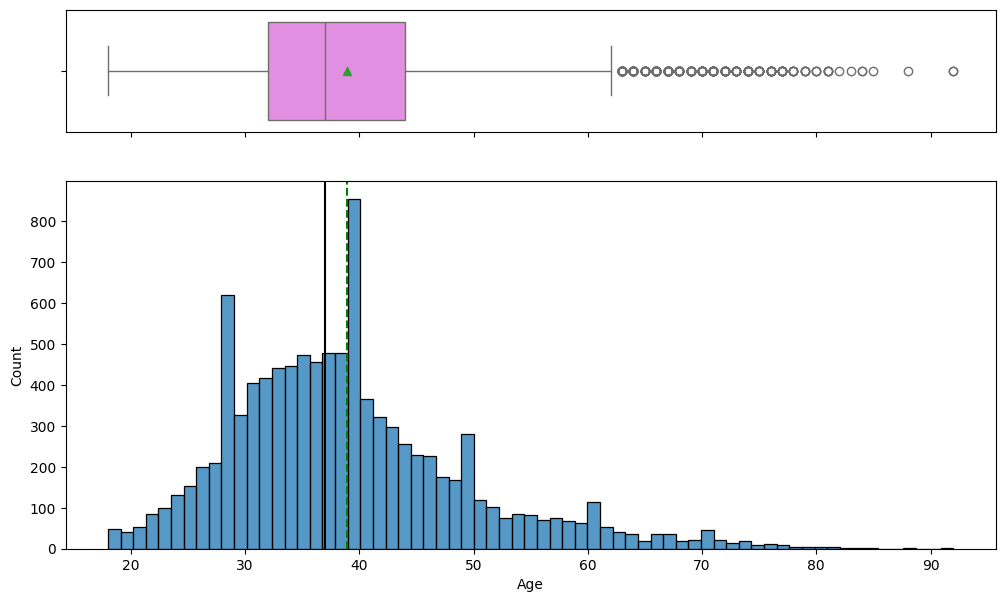

In [ ]:
histogram_boxplot(df, 'Age')

* The data is right skewed with a few values that have a significantly higher count
  * There are several outliers in at the higher end of the data
  * The average age is around 38-39

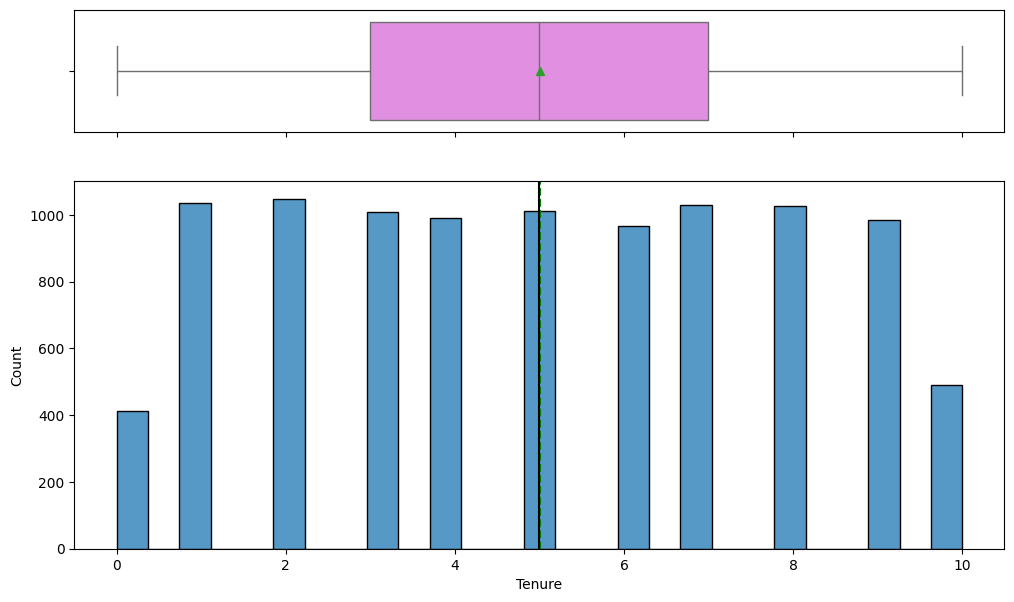

In [ ]:
histogram_boxplot(df, 'Tenure')

* Tenure is very evenly distributed
  * 0 and 10 years are the least common values; all other values have around 1000 customers
  * The average tenure is 5 years

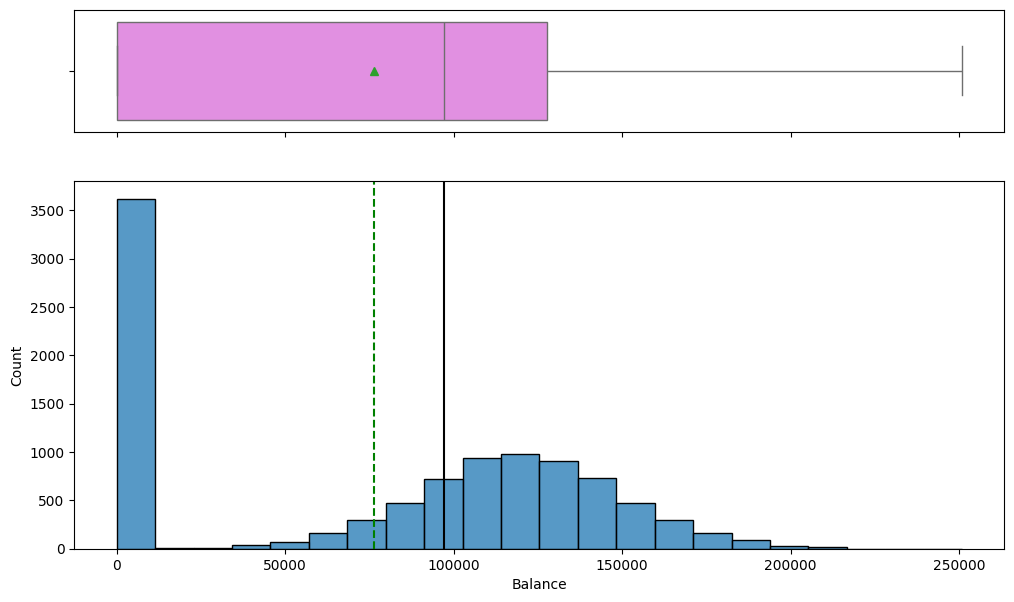

In [ ]:
histogram_boxplot(df, 'Balance')

* Over a third of the data set has no revolving account balance
* Otherwise, the data has normal distribution
  * Because of the large number of 0 balance accounts, the average of the dataset is approximately 75,000

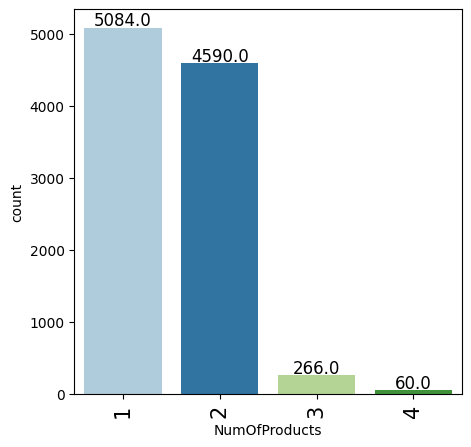

In [ ]:
labeled_barplot(df, 'NumOfProducts')

* The vast majority of customers have purchased 1 or 2 products from the bank

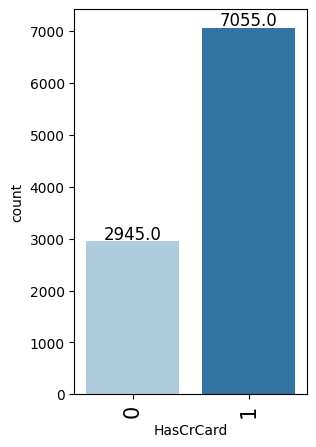

In [ ]:
labeled_barplot(df, 'HasCrCard')

In [ ]:
df['HasCrCard'].value_counts(normalize=True)

,proportion
HasCrCard,
1,0.7055
0,0.2945


* 70% of customers have a credit card

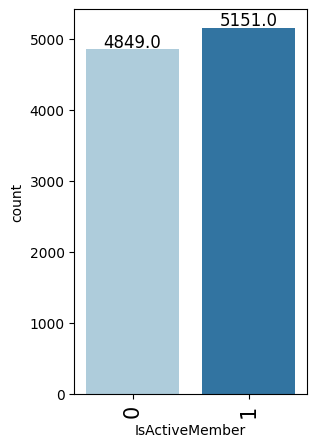

In [ ]:
labeled_barplot(df, 'IsActiveMember')

* This data is split fairly evenly with slightly more customers being a member

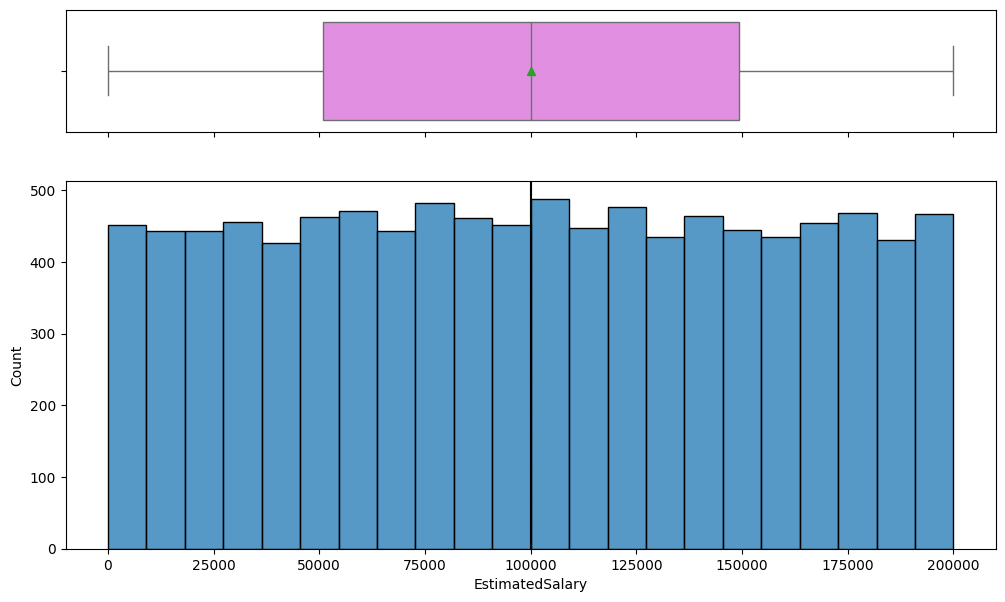

In [ ]:
histogram_boxplot(df, 'EstimatedSalary')

* Estimated Salary is very evenly split
  * No outliers
  * Average salary is 100,000

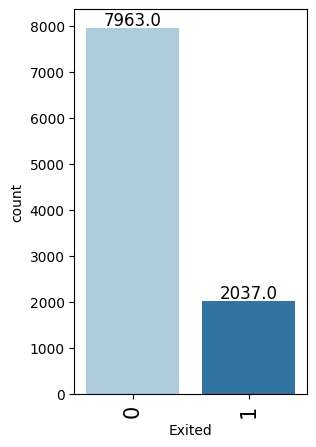

In [ ]:
labeled_barplot(df, 'Exited')

In [ ]:
df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


* This data is quite imbalanced
* Our target variable seems rather similar to the values of HasCrCard

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

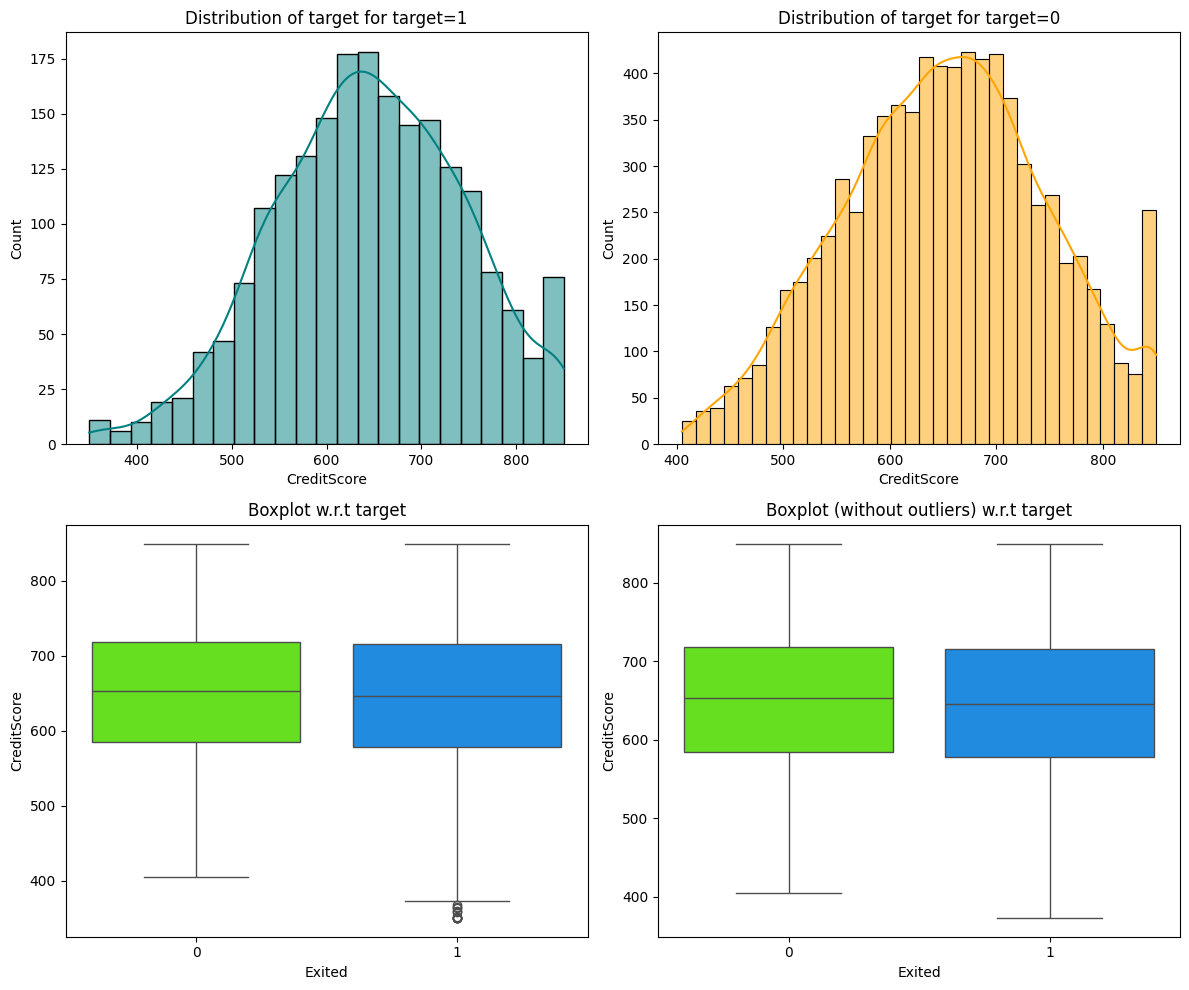

In [ ]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

* The distribution of customers in both classes is very similar

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


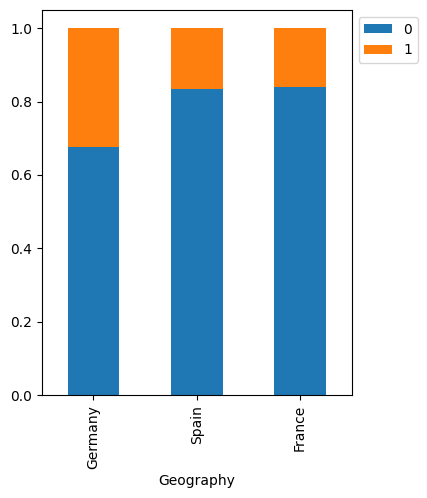

In [ ]:
stacked_barplot(df, 'Geography', 'Exited')

* More customers located in Germany churned than any other location (appox. 33%)

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


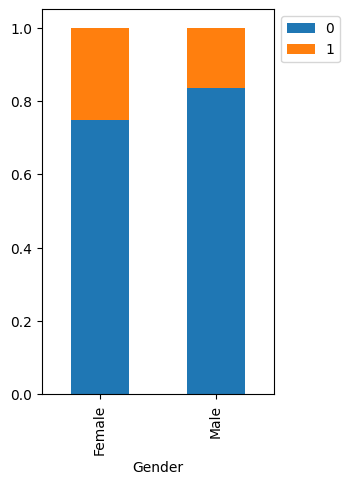

In [ ]:
stacked_barplot(df, 'Gender', 'Exited')

* More females churned than males

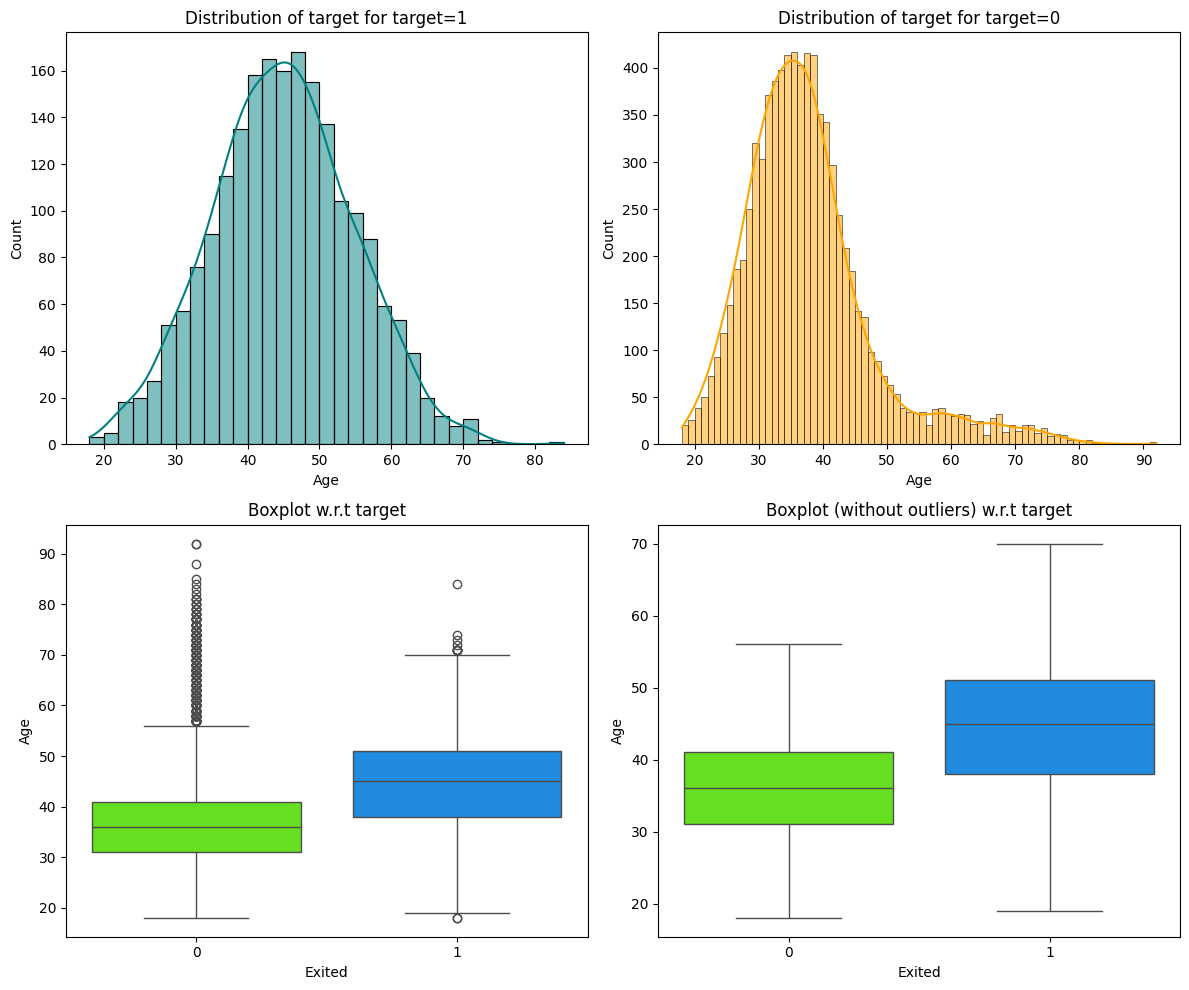

In [ ]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

* Customers that churned on average tended to be older
  * The average age of customer that stayed is around 36, while the average age of customers that exited is around 45

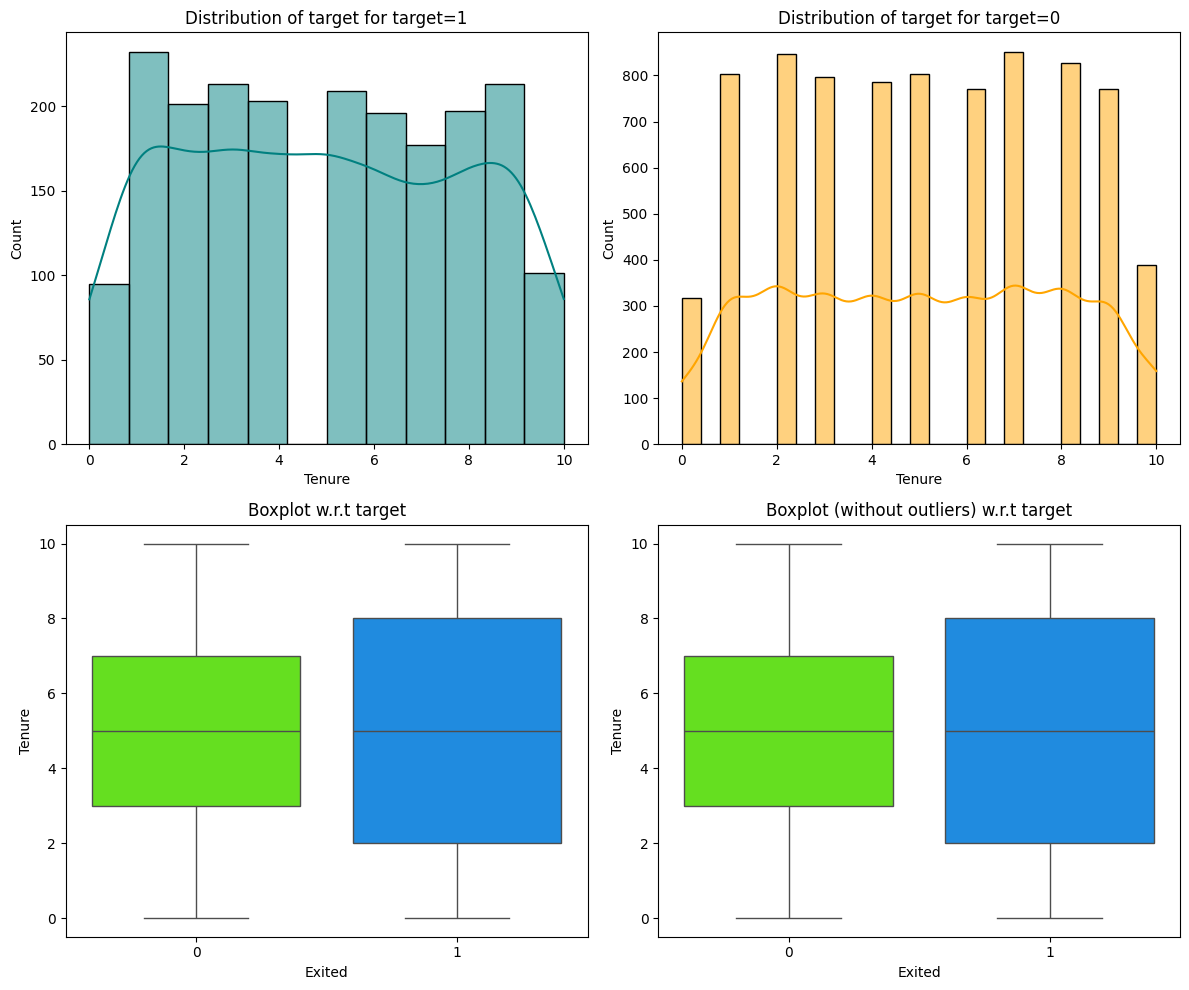

In [ ]:
distribution_plot_wrt_target(df, 'Tenure', 'Exited')

* Surprisingly, the length of tenure does not appear to play a significant role in churn rate
  * Brand loyalty may not be as important of a factor here

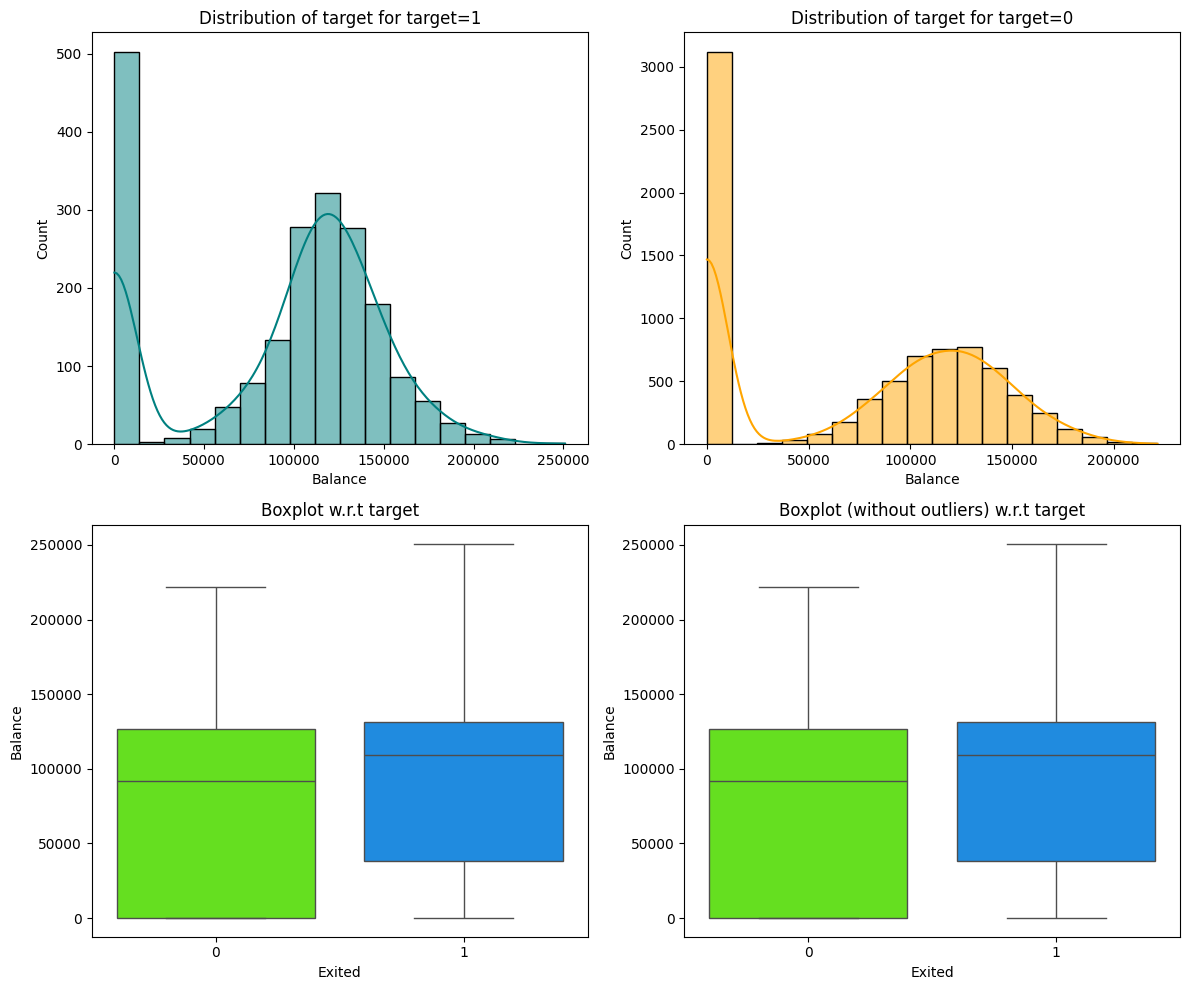

In [ ]:
distribution_plot_wrt_target(df, 'Balance', 'Exited')

* Customers that churned tended to have a slightly higher balance

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


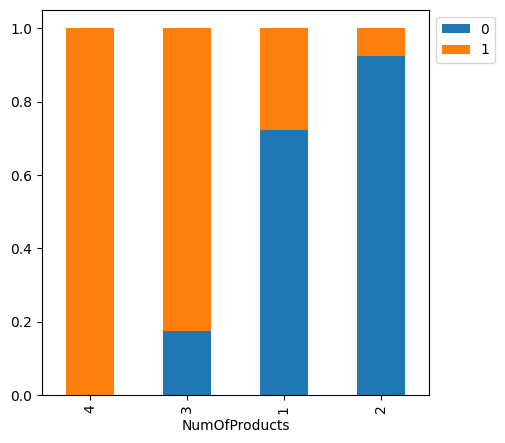

In [ ]:
stacked_barplot(df, 'NumOfProducts', 'Exited')

* All customers with 4 products purchased exited; the vast majority of customers with 3 also exited
* Customers with 2 products were the most likely to remain with the bank

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


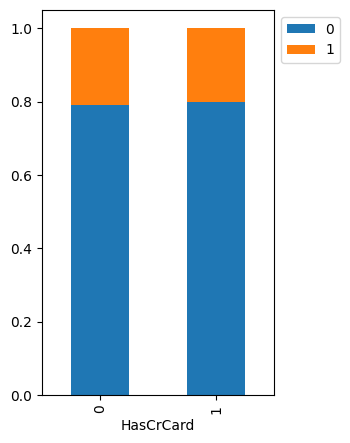

In [ ]:
stacked_barplot(df, 'HasCrCard', 'Exited')

* No correlation between owning a credit card and churning

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


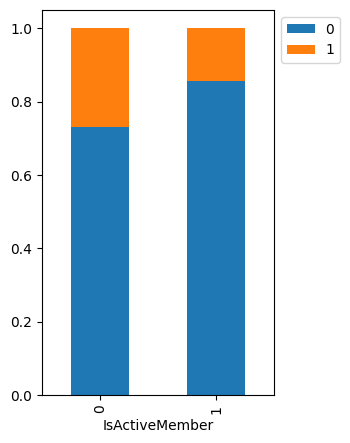

In [ ]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Members are less likely to exit




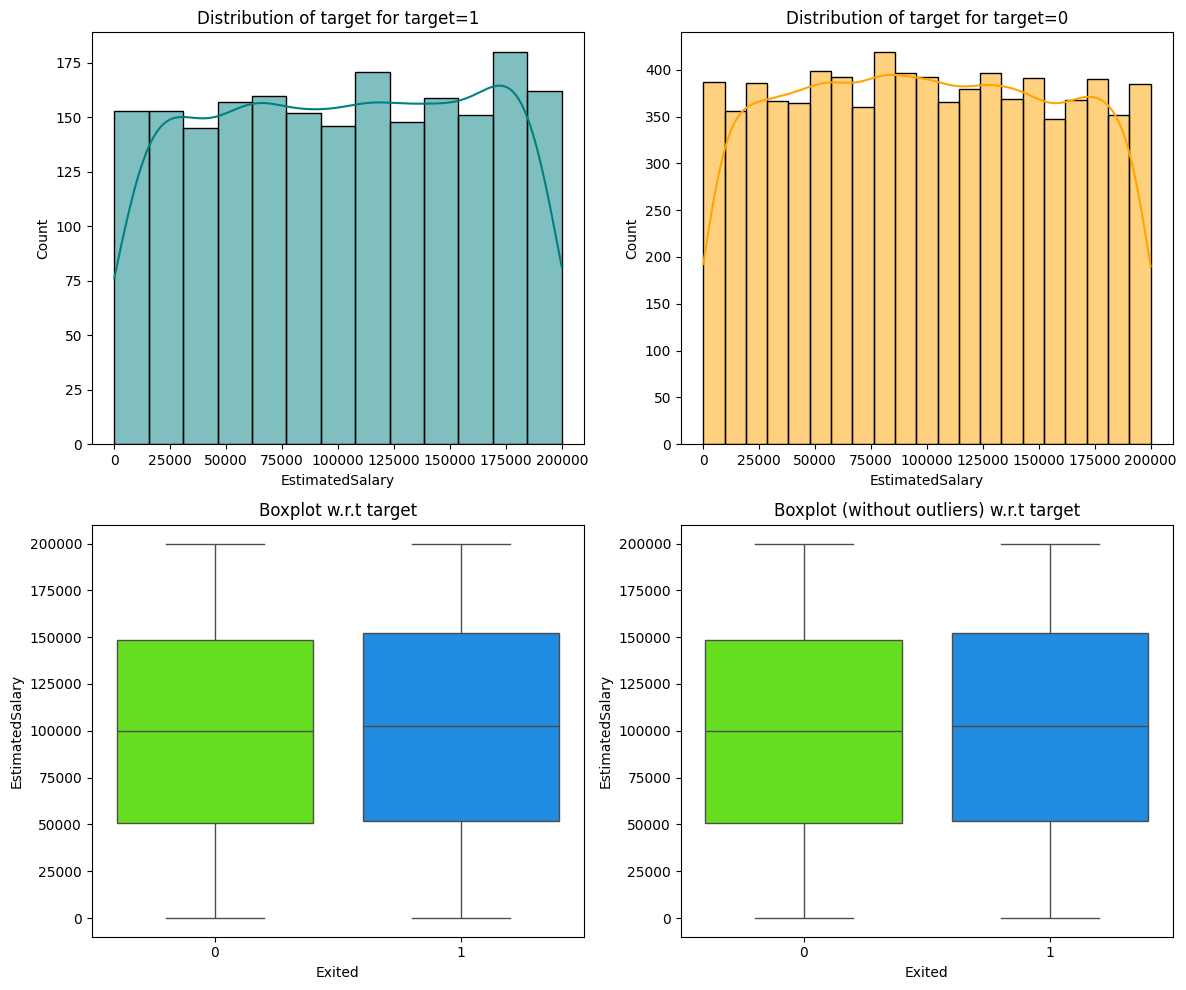

In [ ]:
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

* No correlation between Estimated Salary and Exiting

In [ ]:
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

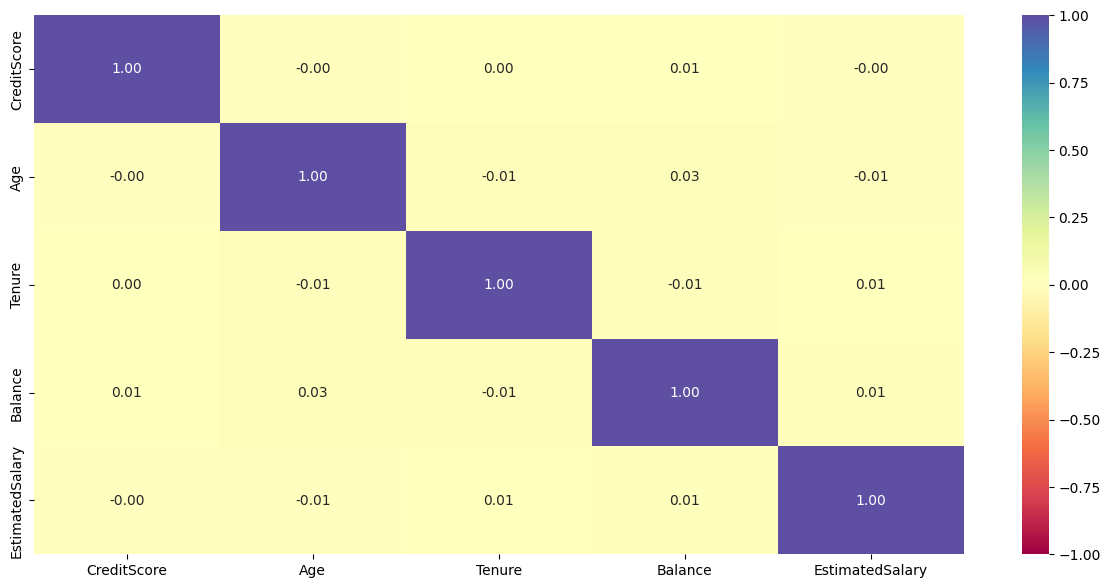

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
cat_cols = [df.columns[i] for i in range(df.shape[1]) if df.dtypes[i]=='object']

In [ ]:
df = pd.get_dummies(df, cat_cols, drop_first=True)

* Geography and Gender are now encoded as categorical features

### Train-validation-test Split

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
X_big, X_test, y_big, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_big, y_big, test_size=0.2, random_state=1, stratify=y_big, shuffle=True)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
print(f' X_train: {X_train.shape} X_val: {X_val.shape} X_test: {X_test.shape}')
print(f' y_train: {y_train.shape[0]} y_val: {y_val.shape[0]} y_test: {y_test.shape[0]}')

 X_train: (6400, 11) X_val: (1600, 11) X_test: (2000, 11)
 y_train: 6400 y_val: 1600 y_test: 2000


* The dataset has been split into training and test sets to be use when building our models
  * The training set is further split into training and validation set to avoid data leakage

### Data Normalization

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

* Scaling the data ensures that the ranges of each variable are equal so one variable isn't measured as more important than another

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.


### **A Model can make wrong predictions in the following ways:**
1. Predicts a customers will churn, but they don't
2. Predicts a customer won't churn, but they do

### **Which case is more important?**
In this case, we will want to minimize the number model predictions that a customer won't churn, but they do end up leaving the bank. This scenario is simply lost revenue. If the bank expends some resources to keep a customer that isn't planning on leaving, there is not a huge loss.

### **How to reduce this loss?**
In order to reduce the number of false negative predictions, we will need to minimize the recall score of the model.

There is a class imbalance in the dataset, so we will be utilizing class weights to allow the model to give proportionally more weight to the minority class.

In [ ]:
def plot_loss(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
def plot_recall(history, name):
    """
    Function to plot recall

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots()
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])

    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    fig.legend(['Train', 'Validation'], loc="outside right upper")
    plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

### Neural Network with SGD Optimizer

* The first models will be a neural network consisting of
  * Two hidden layers with 64 and 32 neurons
  * Activation function of ReLU
  * Optimizer is SGD

In [ ]:
# clears the current Keras session
tf.keras.backend.clear_session()
# setting the seed for random number generators for consistency
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [ ]:
batch_size = 64
epochs = 50

In [ ]:
# creating the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# defining model optimizer as SGD
optimizer = keras.optimizers.SGD()
model.compile(
              loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['recall'],
              )

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose=2
)


Epoch 1/50
100/100 - 2s - 16ms/step - loss: 1.3548 - recall: 0.7025 - val_loss: 0.6557 - val_recall: 0.6994
Epoch 2/50
100/100 - 1s - 9ms/step - loss: 1.2528 - recall: 0.7163 - val_loss: 0.6080 - val_recall: 0.7117
Epoch 3/50
100/100 - 0s - 3ms/step - loss: 1.1845 - recall: 0.7163 - val_loss: 0.5762 - val_recall: 0.7209
Epoch 4/50
100/100 - 0s - 3ms/step - loss: 1.1375 - recall: 0.7193 - val_loss: 0.5549 - val_recall: 0.7209
Epoch 5/50
100/100 - 1s - 6ms/step - loss: 1.1035 - recall: 0.7262 - val_loss: 0.5388 - val_recall: 0.7147
Epoch 6/50
100/100 - 0s - 2ms/step - loss: 1.0760 - recall: 0.7331 - val_loss: 0.5250 - val_recall: 0.7178
Epoch 7/50
100/100 - 0s - 2ms/step - loss: 1.0519 - recall: 0.7439 - val_loss: 0.5137 - val_recall: 0.7147
Epoch 8/50
100/100 - 0s - 3ms/step - loss: 1.0302 - recall: 0.7469 - val_loss: 0.5026 - val_recall: 0.7270
Epoch 9/50
100/100 - 0s - 3ms/step - loss: 1.0105 - recall: 0.7531 - val_loss: 0.4932 - val_recall: 0.7239
Epoch 10/50
100/100 - 0s - 2ms/step 

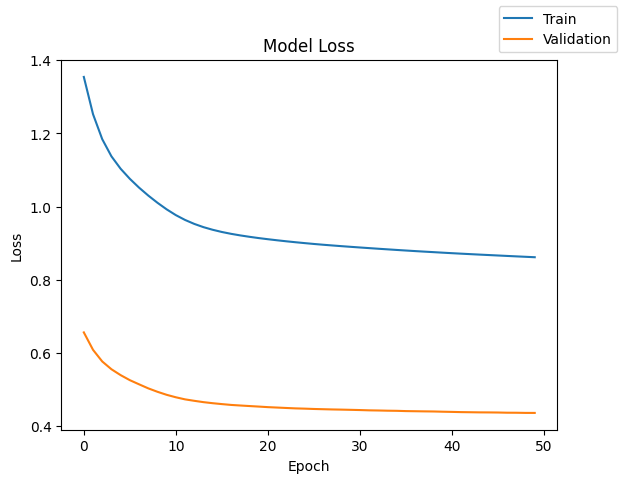

In [ ]:
plot_loss(history, 'loss')

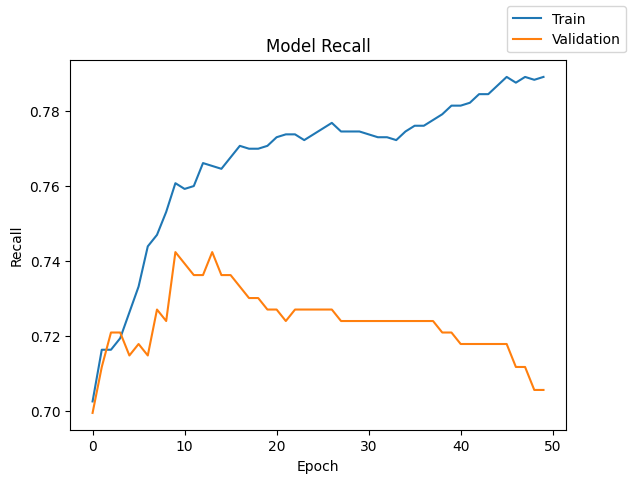

In [ ]:
plot_recall(history, 'recall')

In [ ]:
model_train_perf = model_performance_classification(model, X_train, y_train)
model_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.820156,0.773006,0.541063,0.636565


In [ ]:
model_val_perf = model_performance_classification(model, X_val, y_val)
model_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.80125,0.705521,0.50885,0.59126


In [ ]:
confusion_matrix(y_val, model.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 183, 1091],
       [   3,  323]])

* The recall score on the training data is aroudn 0.47 and is 0.43 on the validation set.
  * While the score is fairly low, the model appears to do a good job of generalizing the data and is not overfit
  * The rate of improvement over epochs is good

## Model Performance Improvement

### Neural Network with Adam Optimizer

* Now we'll try the same model, but use the Adam optimizer rather than SGD

In [ ]:
# clears the current Keras session
tf.keras.backend.clear_session()

In [ ]:
# creating the neural network
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.Adam()
model_1.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['recall']
)

In [ ]:
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose=2
)

Epoch 1/50
100/100 - 2s - 17ms/step - loss: 0.5133 - recall: 0.0667 - val_loss: 0.4333 - val_recall: 0.0982
Epoch 2/50
100/100 - 0s - 4ms/step - loss: 0.4266 - recall: 0.1802 - val_loss: 0.4119 - val_recall: 0.2423
Epoch 3/50
100/100 - 0s - 3ms/step - loss: 0.4048 - recall: 0.2891 - val_loss: 0.3970 - val_recall: 0.2853
Epoch 4/50
100/100 - 0s - 3ms/step - loss: 0.3830 - recall: 0.3436 - val_loss: 0.3809 - val_recall: 0.3190
Epoch 5/50
100/100 - 0s - 2ms/step - loss: 0.3625 - recall: 0.4026 - val_loss: 0.3683 - val_recall: 0.3497
Epoch 6/50
100/100 - 0s - 3ms/step - loss: 0.3484 - recall: 0.4402 - val_loss: 0.3613 - val_recall: 0.3926
Epoch 7/50
100/100 - 0s - 3ms/step - loss: 0.3403 - recall: 0.4586 - val_loss: 0.3582 - val_recall: 0.4141
Epoch 8/50
100/100 - 0s - 2ms/step - loss: 0.3354 - recall: 0.4655 - val_loss: 0.3568 - val_recall: 0.4202
Epoch 9/50
100/100 - 0s - 3ms/step - loss: 0.3319 - recall: 0.4709 - val_loss: 0.3562 - val_recall: 0.4294
Epoch 10/50
100/100 - 0s - 3ms/step 

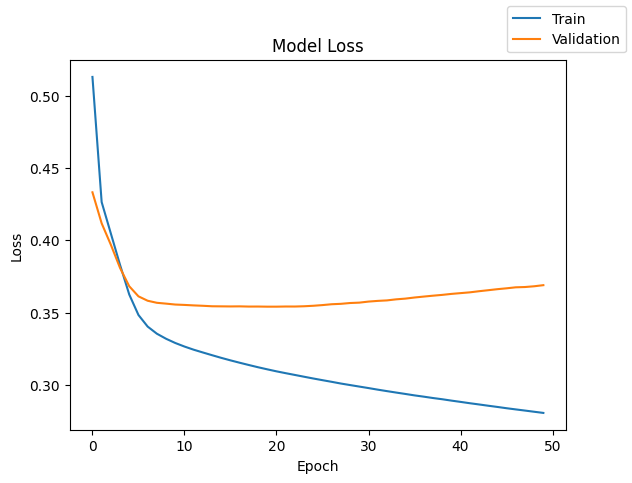

In [ ]:
plot_loss(history_1,'loss')

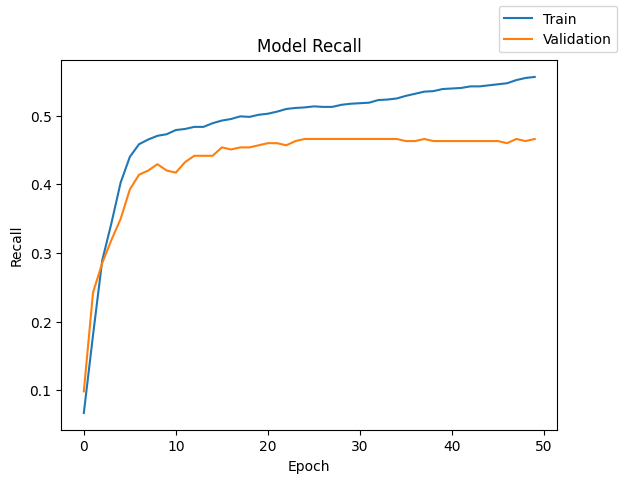

In [ ]:
plot_recall(history_1, 'recall')

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.88375,0.549847,0.820366,0.658402


In [ ]:
model_1_val_perf = model_performance_classification(model_1, X_val, y_val)
model_1_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.850625,0.466258,0.700461,0.559853


In [ ]:
confusion_matrix(y_val, model_1.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[623, 651],
       [ 28, 298]])

* The recall score of the model has improved.
  * Training recall score is 0.55 while validation is 0.47
* There is a slightly larger difference between the training data and the validation data
* The loss function of the validation data meets its minimum after around 8 epochs

### Neural Network with Adam Optimizer and Dropout

* Adding dropout to the Adam optimizer model
  * 20% dropout on the 64 neuron layer, and 10% dropout on the 32 neuron layer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# creating the neural network
model_2 = Sequential()
model_2.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,883 (11.27 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
optimizer = keras.optimizers.Adam()
model_2.compile(
    loss ='binary_crossentropy',
    optimizer = optimizer,
    metrics = ['recall']
)

In [ ]:
history_2 = model_2.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose = 2
)

Epoch 1/50
100/100 - 4s - 39ms/step - loss: 0.4853 - recall: 0.0652 - val_loss: 0.4235 - val_recall: 0.1503
Epoch 2/50
100/100 - 0s - 4ms/step - loss: 0.4302 - recall: 0.2009 - val_loss: 0.4049 - val_recall: 0.2331
Epoch 3/50
100/100 - 0s - 3ms/step - loss: 0.4105 - recall: 0.2922 - val_loss: 0.3854 - val_recall: 0.3160
Epoch 4/50
100/100 - 0s - 3ms/step - loss: 0.3858 - recall: 0.3620 - val_loss: 0.3662 - val_recall: 0.3466
Epoch 5/50
100/100 - 0s - 3ms/step - loss: 0.3686 - recall: 0.4133 - val_loss: 0.3555 - val_recall: 0.4049
Epoch 6/50
100/100 - 0s - 2ms/step - loss: 0.3583 - recall: 0.4356 - val_loss: 0.3512 - val_recall: 0.4172
Epoch 7/50
100/100 - 0s - 3ms/step - loss: 0.3512 - recall: 0.4456 - val_loss: 0.3496 - val_recall: 0.4172
Epoch 8/50
100/100 - 0s - 2ms/step - loss: 0.3468 - recall: 0.4563 - val_loss: 0.3481 - val_recall: 0.4294
Epoch 9/50
100/100 - 0s - 3ms/step - loss: 0.3476 - recall: 0.4647 - val_loss: 0.3476 - val_recall: 0.4325
Epoch 10/50
100/100 - 0s - 3ms/step 

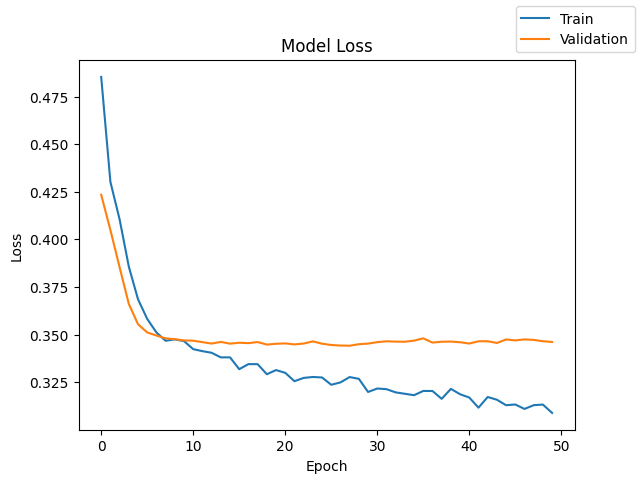

In [ ]:
plot_loss(history_2, 'loss')

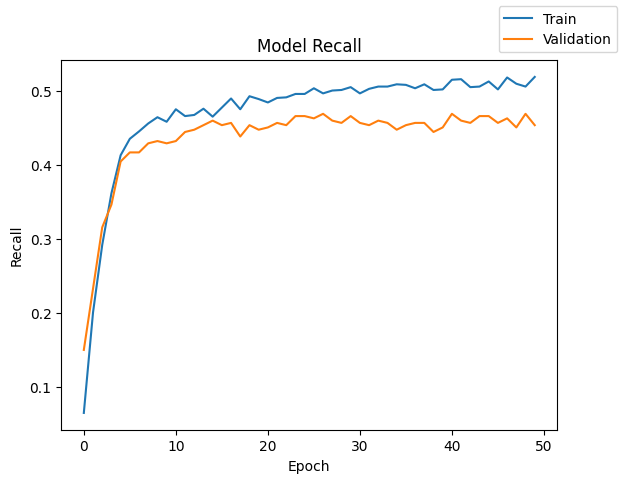

In [ ]:
plot_recall(history_2, 'recall')

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.87875,0.523006,0.815789,0.637383


In [ ]:
model_2_val_perf = model_performance_classification(model_2, X_val, y_val)
model_2_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.853125,0.453988,0.721951,0.557439


In [ ]:
confusion_matrix(y_val, model_2.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[529, 745],
       [ 15, 311]])

* The model appears to be performing roughly the same after adding dropout
  * However, there is more oscillation in the loss function and recall score

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
print('Before Oversampling, counts of label "Yes": {}'.format(sum(y_train==1)))
print('Before Oversampling, counts of label "No": {}'.format(sum(y_train==0)))

sm = SMOTE(random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print('After Oversampling, counts of label "Yes": {}'.format(sum(y_train_over==1)))
print('After Oversampling, counts of label "No": {}'.format(sum(y_train_over==0)))

print('After Oversampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After Oversampling, the shape of train_y: {}'.format(y_train_over.shape))

Before Oversampling, counts of label "Yes": 1304
Before Oversampling, counts of label "No": 5096
After Oversampling, counts of label "Yes": 5096
After Oversampling, counts of label "No": 5096
After Oversampling, the shape of train_X: (10192, 11)
After Oversampling, the shape of train_y: (10192,)


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# creating the neural network
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_dim=X_train_over.shape[1]))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.SGD()

model_3.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['recall']
)

In [ ]:
history_3 = model_3.fit(
    X_train_over, y_train_over,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose = 2
)

Epoch 1/50
160/160 - 1s - 8ms/step - loss: 0.6504 - recall: 0.7563 - val_loss: 0.6468 - val_recall: 0.6840
Epoch 2/50
160/160 - 0s - 2ms/step - loss: 0.6160 - recall: 0.6666 - val_loss: 0.6080 - val_recall: 0.6687
Epoch 3/50
160/160 - 0s - 2ms/step - loss: 0.5913 - recall: 0.6631 - val_loss: 0.5808 - val_recall: 0.6503
Epoch 4/50
160/160 - 0s - 2ms/step - loss: 0.5724 - recall: 0.6554 - val_loss: 0.5602 - val_recall: 0.6503
Epoch 5/50
160/160 - 0s - 2ms/step - loss: 0.5580 - recall: 0.6666 - val_loss: 0.5444 - val_recall: 0.6503
Epoch 6/50
160/160 - 0s - 2ms/step - loss: 0.5460 - recall: 0.6782 - val_loss: 0.5319 - val_recall: 0.6656
Epoch 7/50
160/160 - 0s - 2ms/step - loss: 0.5355 - recall: 0.6896 - val_loss: 0.5209 - val_recall: 0.6718
Epoch 8/50
160/160 - 1s - 5ms/step - loss: 0.5256 - recall: 0.7029 - val_loss: 0.5111 - val_recall: 0.6933
Epoch 9/50
160/160 - 0s - 3ms/step - loss: 0.5161 - recall: 0.7129 - val_loss: 0.5020 - val_recall: 0.6902
Epoch 10/50
160/160 - 1s - 4ms/step -

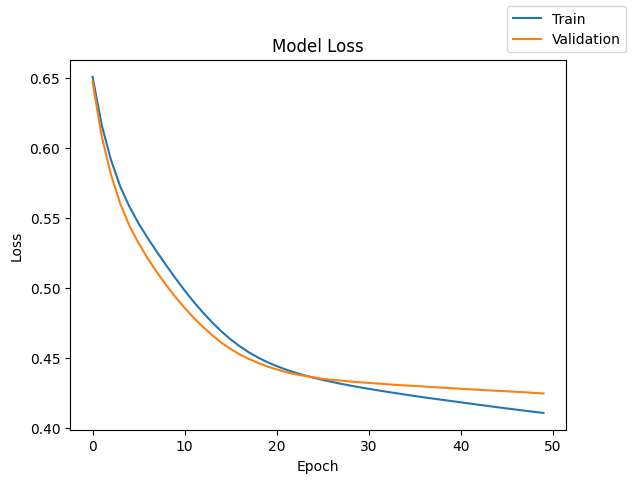

In [ ]:
plot_loss(history_3, 'loss')

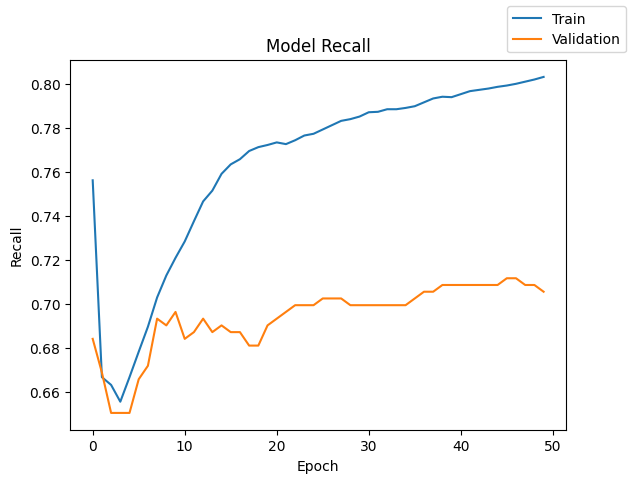

In [ ]:
plot_recall(history_3, 'recall')

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_over, y_train_over)
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.811715,0.780416,0.832531,0.805632


In [ ]:
model_3_val_perf = model_performance_classification(model_3, X_val, y_val)
model_3_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.809375,0.705521,0.523918,0.601307


In [ ]:
confusion_matrix(y_val, model_3.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 254, 1020],
       [   5,  321]])

* The loss function and recall score increased significantly
  * As seen in the confusion matrix, there were only 5 false negative predictions

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# creating the neural network
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_dim=X_train_over.shape[1]))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.Adam()

model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizer,
    metrics = ['recall']
)

In [ ]:
history_4 = model_4.fit(
    X_train_over, y_train_over,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose = 2
)

Epoch 1/50
160/160 - 2s - 12ms/step - loss: 0.5575 - recall: 0.7174 - val_loss: 0.4670 - val_recall: 0.6963
Epoch 2/50
160/160 - 0s - 2ms/step - loss: 0.4597 - recall: 0.7779 - val_loss: 0.4274 - val_recall: 0.6871
Epoch 3/50
160/160 - 0s - 2ms/step - loss: 0.4355 - recall: 0.7885 - val_loss: 0.4212 - val_recall: 0.7086
Epoch 4/50
160/160 - 0s - 2ms/step - loss: 0.4254 - recall: 0.7951 - val_loss: 0.4177 - val_recall: 0.7117
Epoch 5/50
160/160 - 0s - 2ms/step - loss: 0.4180 - recall: 0.8002 - val_loss: 0.4162 - val_recall: 0.7147
Epoch 6/50
160/160 - 0s - 2ms/step - loss: 0.4122 - recall: 0.8034 - val_loss: 0.4155 - val_recall: 0.7178
Epoch 7/50
160/160 - 0s - 2ms/step - loss: 0.4074 - recall: 0.8083 - val_loss: 0.4145 - val_recall: 0.7178
Epoch 8/50
160/160 - 1s - 4ms/step - loss: 0.4028 - recall: 0.8124 - val_loss: 0.4152 - val_recall: 0.7117
Epoch 9/50
160/160 - 0s - 2ms/step - loss: 0.3986 - recall: 0.8157 - val_loss: 0.4154 - val_recall: 0.7055
Epoch 10/50
160/160 - 1s - 4ms/step 

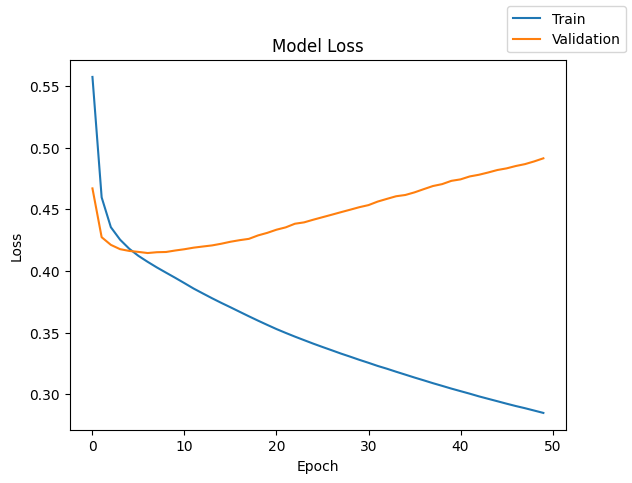

In [ ]:
plot_loss(history_4, 'loss')

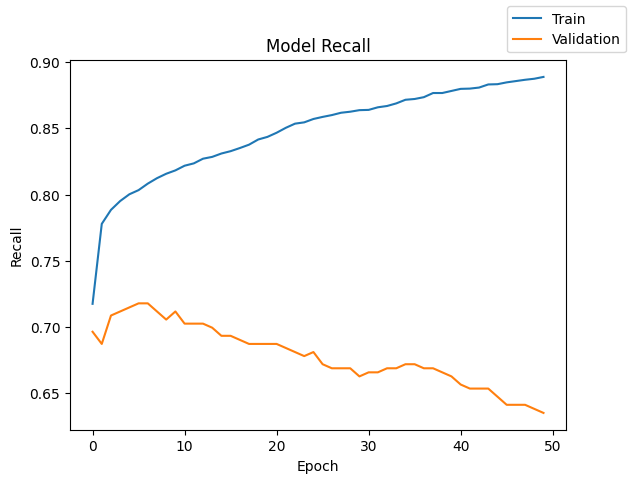

In [ ]:
plot_recall(history_4, 'recall')

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_over, y_train_over)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.886872,0.890895,0.883784,0.887325


In [ ]:
model_4_val_perf = model_performance_classification(model_4, X_val, y_val)
model_4_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7825,0.634969,0.474771,0.543307


In [ ]:
confusion_matrix(y_val, model_4.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[547, 727],
       [ 32, 294]])

* When using oversampled data with the Adam optimizer, the model seems to be overfitting the data
  * There is a substantial difference between the recall score of the training and validation data

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# creating the neural network
model_5 = Sequential()
model_5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model_5.add(Dropout(0.2))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.1))
model_5.add(Dense(1, activation='sigmoid'))

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = keras.optimizers.Adam()

model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizer,
    metrics = ['recall']
)

In [ ]:
history_5 = model_5.fit(
    X_train_over, y_train_over,
    validation_data = (X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    class_weight = cw_dict,
    verbose = 2
)

Epoch 1/50
160/160 - 2s - 13ms/step - loss: 0.5981 - recall: 0.6933 - val_loss: 0.4815 - val_recall: 0.6411
Epoch 2/50
160/160 - 0s - 2ms/step - loss: 0.5157 - recall: 0.7469 - val_loss: 0.4480 - val_recall: 0.6963
Epoch 3/50
160/160 - 0s - 2ms/step - loss: 0.4822 - recall: 0.7624 - val_loss: 0.4289 - val_recall: 0.6779
Epoch 4/50
160/160 - 0s - 2ms/step - loss: 0.4696 - recall: 0.7677 - val_loss: 0.4314 - val_recall: 0.6994
Epoch 5/50
160/160 - 0s - 2ms/step - loss: 0.4565 - recall: 0.7745 - val_loss: 0.4225 - val_recall: 0.6963
Epoch 6/50
160/160 - 0s - 2ms/step - loss: 0.4523 - recall: 0.7816 - val_loss: 0.4189 - val_recall: 0.6963
Epoch 7/50
160/160 - 1s - 4ms/step - loss: 0.4439 - recall: 0.7822 - val_loss: 0.4146 - val_recall: 0.6840
Epoch 8/50
160/160 - 1s - 4ms/step - loss: 0.4428 - recall: 0.7869 - val_loss: 0.4119 - val_recall: 0.6933
Epoch 9/50
160/160 - 0s - 2ms/step - loss: 0.4378 - recall: 0.7873 - val_loss: 0.4086 - val_recall: 0.6902
Epoch 10/50
160/160 - 1s - 4ms/step 

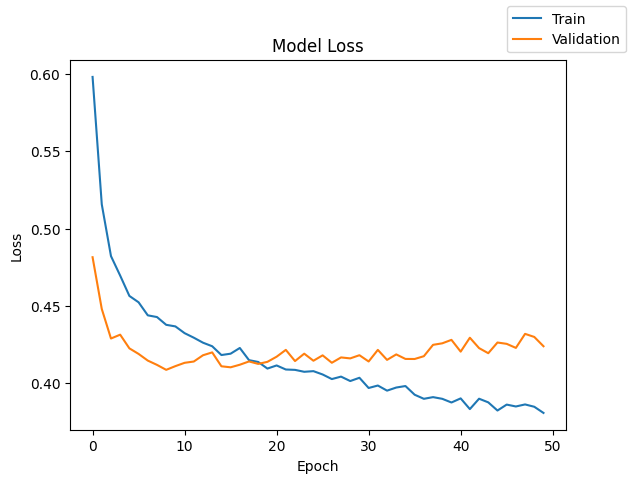

In [ ]:
plot_loss(history_5, 'loss')

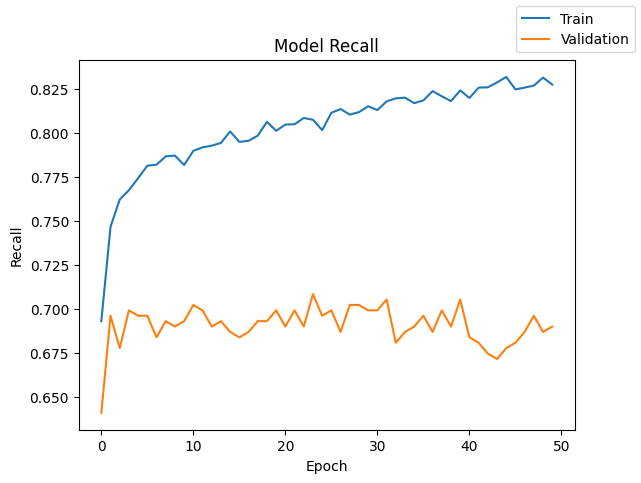

In [ ]:
plot_recall(history_5, 'recall')

In [ ]:
model_5_train_perf = model_performance_classification(model_5, X_train_over, y_train_over)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.846448,0.826923,0.860527,0.84339


In [ ]:
model_5_val_perf = model_performance_classification(model_5, X_val, y_val)
model_5_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.815625,0.690184,0.536993,0.604027


In [ ]:
confusion_matrix(y_val, model_5.predict(X_val) > 0.05)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[404, 870],
       [ 12, 314]])

* Similarly to the Adam optimizer with dropout model above, this model, after adding dropout, does not improve the recall score
  * Again, there is more oscillation in the model over each epoch
* This model, however, is significantly less overfit the before adding dropout

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network 1 (Adam)",
    "Neural Network 2 (Adam with Dropout)",
    "Neural Network 3 (SGD with Oversampling)",
    "Neural Network 4 (Adam with Oversampling)",
    "Neural Network 5 (Adam with Oversampling and Dropout)",
]

In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        model_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network 1 (Adam)",
    "Neural Network 2 (Adam with Dropout)",
    "Neural Network 3 (SGD with Oversampling)",
    "Neural Network 4 (Adam with Oversampling)",
    "Neural Network 5 (Adam with Oversampling and Dropout)",
]

In [ ]:
models_train_comp_df

,Neural Network (SGD),Neural Network 1 (Adam),Neural Network 2 (Adam with Dropout),Neural Network 3 (SGD with Oversampling),Neural Network 4 (Adam with Oversampling),Neural Network 5 (Adam with Oversampling and Dropout)
Accuracy,0.820156,0.883750,0.878750,0.811715,0.886872,0.846448
Recall,0.773006,0.549847,0.523006,0.780416,0.890895,0.826923
Precision,0.541063,0.820366,0.815789,0.832531,0.883784,0.860527
F1 Score,0.636565,0.658402,0.637383,0.805632,0.887325,0.843390


In [ ]:
models_val_comp_df

,Neural Network (SGD),Neural Network 1 (Adam),Neural Network 2 (Adam with Dropout),Neural Network 3 (SGD with Oversampling),Neural Network 4 (Adam with Oversampling),Neural Network 5 (Adam with Oversampling and Dropout)
Accuracy,0.801250,0.850625,0.853125,0.809375,0.782500,0.815625
Recall,0.705521,0.466258,0.453988,0.705521,0.634969,0.690184
Precision,0.508850,0.700461,0.721951,0.523918,0.474771,0.536993
F1 Score,0.591260,0.559853,0.557439,0.601307,0.543307,0.604027


* Based on the metrics above from all of the models, the Neural Network with SGD optimizer and Oversampled data performs the best.
* The model with the Adam optimizer, Oversampled data, and Dropout also performed well on the training and validation data
  * The Adam with Oversampling model was originally overfit, but utilizing dropout in the hidden layers helped the model generalize the data better
* The recall scores of the models without oversampled data underperform due the class imbalance of the dataset

In [ ]:
model_test_perf = model_performance_classification(model_3, X_test, y_test)
model_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.798,0.678133,0.502732,0.577406


In [ ]:
confusion_matrix(y_test, model_3.predict(X_test) > 0.05)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 299, 1294],
       [   9,  398]])

In [ ]:
X_test.shape[0]

2000

* Using model 3 (SGD with Oversampling), the model performs with a recall score of 0.68. As shown with the confusion matrix, only 9 out of 2000 customers in the unseen testing dataset were wrongly classified as false negatives.
  * The large number in the false positive category does tell us that the model tends to regard the majority of customer as "likely to churn." Essentially, the model is overly caution in identifying customers that are likely to churn and in turn, falsely classifies many false positives. However, false positive are not a concern for the bank

## Actionable Insights and Business Recommendations

* The bank can use the model with SGD optimizer and oversampling techniques to predict which customers will churn. This model minimizes the number of false negatives (when the model predicts the will customer will stay, but they churn).
* As found from EDA, older customers tend to be more likely to churn. Approximately 75% of customers that exited the bank were above the age of 40; 75% of the customers that did not churn were under the age of 40.
  * Introducing some marketing to a slightly older demographic could target those who might be considering leaving the bank
* All customers that owned 4 products from the bank churned, and the vast majority of customers that owned 3 products also churned.
  * Customers may often rely on brand loyalty when choosing to purchase a product from a bank; however, owning more products from the same bank may lead to churning if they find better rates with another bank.
  * Ensuring competitive rates on every product offered may help retain customers and encourage brand loyalty in a positive light
* Bank members were less likely to churn than non-members. Offering incentives to becoming a member could encourage more customers to join while also helping to retain current customers.



<font size=6 color='blue'>Power Ahead</font>
___